<h1><center> UFU - Universidade Federal de Uberlândia</center></h1>

<h2><center>Graduação em Engenharia Civil</center></h2>

<h3><center>INICIAÇÃO CIENTÍFICA</center><br>
TÍTULO: DESENVOLVIMENTO DE MODELOS DE PREVISÃO DE CHUVAS USANDO
APRENDIZADO DE MÁQUINA <br>
<br>
ALUNO: Pedro Augusto Toledo Rios</h3>

<p>Este notebook é referente à Iniciação Ciêntífica na área de Ciência da Computação/Ánalise de Dados .</p>

# Classificação 

## Importações e Configurações Iniciais

In [9]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sn

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import  metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Análise Exploratória dos Dados

In [10]:
#Tratamento de dados
missing_values = ['n/a','na','*****','*','*******',' -', '******', '5..84', '3..66', '3.3.21', '1..41', '********', '3.7.94', '354.59*', '564..79', '5.04.24', '21:36','**********', '***', '*********', '03:18', '00:00', '03:48', '08:42', '03:06', '09:06', '01:30', '07:48', '09:12', '10:18', '01:24', '#VALUE!' , '926,4923,8', '27/07/1902**21:36:00', '-','*****','185.488.992','484.432.416','464.022.624','497.038.464','549.863.808','568.472.736','476.028.384','306.747.168','55.226.496']

dados_clima = pd.read_csv("C:/Users/riospedro/OneDrive - Universidade Federal de Uberlândia/Área de Trabalho/python 05-11/Titanic/modelo global/Classificação/dadosclima_PERIODOCHUVOSO - Copia.csv", header = None, sep=';', na_values=missing_values)
dados_clima.columns=['Temp Máx (°C)', 'Temp Mín (°C)', 'Temp Média (°C)', 'Velocidade do Vento (km/h)', 'Radiação solar (cal/cm²/h)', 'Pressão (mb)', 'UR (%)', 'Chuva (mm)', 'Mês', 'Ano', 'Chuvoso/Seco']
dados_clima['Ano'] = dados_clima['Ano'].str.replace(',,', '')
dados_clima['Ano'] = dados_clima['Ano'].astype(int)




combine = [dados_clima]
chuva = dados_clima['Chuva (mm)']

#Primeiras cinco linhas dos dados pós-tratados
dados_clima.head()
dados_clima.dropna()

#Número de missing values encontrdos em cada coluna
print(dados_clima.isnull().sum())

Temp Máx (°C)                 116
Temp Mín (°C)                 114
Temp Média (°C)               103
Velocidade do Vento (km/h)    352
Radiação solar (cal/cm²/h)    371
Pressão (mb)                  206
UR (%)                        831
Chuva (mm)                     76
Mês                             0
Ano                             0
Chuvoso/Seco                    0
dtype: int64


### Criação de uma nova classe que determina se naquele dia choveu ou não

In [11]:
#dados_clima['Choveu?']= chuva

# Loop que preenche a nova coluna com 0(não choveu) e 1(choveu)
for dados_clima in combine:    
    dados_clima.loc[ dados_clima['Chuva (mm)'] == 0, 'Choveu?'] = 0
    dados_clima.loc[(dados_clima['Chuva (mm)'] > 0), 'Choveu?'] = 1

#Visualização das primeiras cinco linhas da tabela
dados_clima.head()   
    

,Temp Máx (°C),Temp Mín (°C),Temp Média (°C),Velocidade do Vento (km/h),Radiação solar (cal/cm²/h),Pressão (mb),UR (%),Chuva (mm),Mês,Ano,Chuvoso/Seco,Choveu?
0,26.8,14.0,20.4,3.39,340.16,926.1,88.5,23.6,1,1983,1,1.0
1,27.2,13.0,20.1,3.02,340.16,927.6,86.6,20.4,1,1983,1,1.0
2,27.4,17.2,22.3,5.97,370.18,930.0,87.2,21.2,1,1983,1,1.0
3,28.2,17.0,22.6,4.25,420.20,931.3,8.0,0.0,1,1983,1,0.0
4,29.0,18.2,23.6,3.25,160.08,931.4,91.8,40.0,1,1983,1,1.0


In [12]:
dados_clima.describe()

,Temp Máx (°C),Temp Mín (°C),Temp Média (°C),Velocidade do Vento (km/h),Radiação solar (cal/cm²/h),Pressão (mb),UR (%),Chuva (mm),Mês,Ano,Chuvoso/Seco,Choveu?
count,6534.000000,6536.000000,6547.000000,6298.000000,6279.000000,6444.000000,5819.000000,6574.000000,6650.000000,6650.000000,6650.0,6574.000000
mean,29.187940,16.265805,22.752215,3.436291,417.517903,937.156394,72.721292,5.477434,6.480902,2000.751579,1.0,0.470642
std,3.262865,2.754950,2.555708,2.694230,134.982062,238.104756,14.551384,10.366235,4.575137,10.537214,0.0,0.499175
min,2.000000,1.600000,0.000000,0.000000,0.000000,28.800000,0.000000,0.000000,1.000000,1983.000000,1.0,0.000000
25%,27.400000,14.800000,21.400000,1.700000,330.160000,927.800000,64.350000,0.000000,2.000000,1992.000000,1.0,0.000000
50%,29.600000,16.600000,23.200000,2.720000,430.210000,931.600000,74.000000,0.000000,3.000000,2001.000000,1.0,0.000000
75%,31.400000,18.200000,24.475000,4.350000,515.050000,935.800000,83.800000,6.000000,11.000000,2010.000000,1.0,1.000000
max,39.200000,28.600000,34.200000,33.910000,1019.570000,9925.800000,100.000000,57.600000,12.000000,2019.000000,1.0,1.000000


### Tratamento dos Missing Values


In [14]:
#Tratar os Missing Values (Valores Ausentes)
dados_clima['Radiação solar (cal/cm²/h)'] = dados_clima['Radiação solar (cal/cm²/h)'].astype(float)
dados_clima['UR (%)'].dropna()
dados_clima['UR (%)'] = dados_clima['UR (%)'].astype(float)
dados_clima['UR (%)'] = dados_clima['Radiação solar (cal/cm²/h)'].astype(float)
dados_clima['Temp Mín (°C)'].fillna(method='ffill',inplace = True)   #ffill => preencher com a última temperatura antes do Missing Value
dados_clima['Temp Média (°C)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última temperatura antes do Missing Value
dados_clima['Velocidade do Vento (km/h)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última velocidade antes do Missing Value
dados_clima['Velocidade do Vento (km/h)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última velocidade antes do Missing Value
dados_clima['Radiação solar (cal/cm²/h)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última radiação antes do Missing Value
dados_clima['UR (%)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última taxa UR antes do Missing Value
dados_clima['Chuva (mm)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última quantidade antes do Missing Value
dados_clima['Pressão (mb)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última pressão antes do Missing Value
dados_clima['Choveu?'].fillna(method='ffill',inplace = True) #ffill => preencher com a última pressão antes do Missing Value
dados_clima['Temp Máx (°C)'].fillna(method='ffill',inplace = True)   #ffill => preencher com a última temperatura antes do Missing Value
dados_clima['Choveu?'] = dados_clima['Choveu?'].dropna()




#verificar os missing values após a imputação acima
print('\nMissing Values no dataframe  após o tratamento:\n',dados_clima.isnull().sum(), sep="")


Missing Values no dataframe  após o tratamento:
Temp Máx (°C)                 0
Temp Mín (°C)                 0
Temp Média (°C)               0
Velocidade do Vento (km/h)    0
Radiação solar (cal/cm²/h)    0
Pressão (mb)                  0
UR (%)                        0
Chuva (mm)                    0
Mês                           0
Ano                           0
Chuvoso/Seco                  0
Choveu?                       0
dtype: int64


C:\Users\riospedro\AppData\Local\Temp\ipykernel_10572\1681923286.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dados_clima['Temp Mín (°C)'].fillna(method='ffill',inplace = True)   #ffill => preencher com a última temperatura antes do Missing Value
C:\Users\riospedro\AppData\Local\Temp\ipykernel_10572\1681923286.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dados_clima['Temp Média (°C)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última temperatura antes do Missing Value
C:\Users\riospedro\AppData\Local\Temp\ipykernel_10572\1681923286.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dados_clima['Velocidade do Vento (km/h)'].fillna(method='ffill',inplace = True) #ffill => preencher com a úl

In [15]:
dados_clima.describe()

,Temp Máx (°C),Temp Mín (°C),Temp Média (°C),Velocidade do Vento (km/h),Radiação solar (cal/cm²/h),Pressão (mb),UR (%),Chuva (mm),Mês,Ano,Chuvoso/Seco,Choveu?
count,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000,6650.0,6650.000000
mean,29.237684,16.255699,22.769406,3.342071,415.386066,937.078391,415.386066,5.534128,6.480902,2000.751579,1.0,0.472782
std,3.262689,2.738210,2.543808,2.662935,134.281612,234.389341,134.281612,10.422045,4.575137,10.537214,0.0,0.499296
min,2.000000,1.600000,0.000000,0.000000,0.000000,28.800000,0.000000,0.000000,1.000000,1983.000000,1.0,0.000000
25%,27.400000,14.900000,21.400000,1.580000,331.717500,927.900000,331.717500,0.000000,2.000000,1992.000000,1.0,0.000000
50%,29.600000,16.600000,23.200000,2.630000,426.070000,931.600000,426.070000,0.000000,3.000000,2001.000000,1.0,0.000000
75%,31.500000,18.200000,24.500000,4.240000,510.697500,935.800000,510.697500,6.100000,11.000000,2010.000000,1.0,1.000000
max,39.200000,28.600000,34.200000,33.910000,1019.570000,9925.800000,1019.570000,57.600000,12.000000,2019.000000,1.0,1.000000


### Seleção dos Períodos de Treino e Teste

In [16]:
# 70% para treino / 30% para teste

data_inicio = 1980
data_fim = 2020
data_inicio_treinamento = 1980
data_fim_treinamento = 2008
data_inicio_teste = 2009
data_fim_teste = 2019

dadosparateste = dados_clima.copy()

In [17]:
dadosparateste.drop(columns = ['Chuva (mm)'], axis = 1, inplace=True)
#dadosparateste.drop(columns = ['UR (%)'], axis = 1, inplace=True)

In [18]:
dadosparateste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Temp Máx (°C)               6650 non-null   float64
 1   Temp Mín (°C)               6650 non-null   float64
 2   Temp Média (°C)             6650 non-null   float64
 3   Velocidade do Vento (km/h)  6650 non-null   float64
 4   Radiação solar (cal/cm²/h)  6650 non-null   float64
 5   Pressão (mb)                6650 non-null   float64
 6   UR (%)                      6650 non-null   float64
 7   Mês                         6650 non-null   int64  
 8   Ano                         6650 non-null   int32  
 9   Chuvoso/Seco                6650 non-null   int64  
 10  Choveu?                     6650 non-null   float64
dtypes: float64(8), int32(1), int64(2)
memory usage: 545.6 KB


#  Modelos de Aprendizado de Máquina (Machine Learning)

## Criação de um dataframe de Treinamento e Teste

In [19]:
#Criar os dataframe de Treinamento e Teste
df_train =  dadosparateste[dadosparateste['Ano'] >= data_inicio_treinamento]
df_train =  dadosparateste[dadosparateste['Ano'] <= data_fim_treinamento]
df_test = dadosparateste[dadosparateste['Ano'] >= data_inicio_teste]
df_test =  dadosparateste[dadosparateste['Ano'] <= data_fim_teste]

x_train = df_train.iloc[:,0:7]
y_train = df_train[['Choveu?']]

x = df_test.iloc[:,0:7]
y = df_test[['Choveu?']]

x.head()

,Temp Máx (°C),Temp Mín (°C),Temp Média (°C),Velocidade do Vento (km/h),Radiação solar (cal/cm²/h),Pressão (mb),UR (%)
0,26.8,14.0,20.4,3.39,340.16,926.1,340.16
1,27.2,13.0,20.1,3.02,340.16,927.6,340.16
2,27.4,17.2,22.3,5.97,370.18,930.0,370.18
3,28.2,17.0,22.6,4.25,420.20,931.3,420.20
4,29.0,18.2,23.6,3.25,160.08,931.4,160.08


## Modelo 1 - XGBoost para determinar se choveu ou não

In [20]:
#Criando objet classeifer XGBoost
XGboost = xgb.XGBClassifier()
 
#Treinando o XGBoost Classifer
modelxgb = XGboost.fit(x, y)

#Testando 

y_pred4 = modelxgb.predict(x_train)

c:\Users\riospedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\riospedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\riospedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\riospedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future ve

In [21]:
#Scores

print('Precision: %.3f' % precision_score(y_train, y_pred4))
print('Accuracy: %.3f' % accuracy_score(y_train, y_pred4))
print('Recall: %.3f' % recall_score(y_train, y_pred4))

Precision: 0.877
Accuracy: 0.890
Recall: 0.891


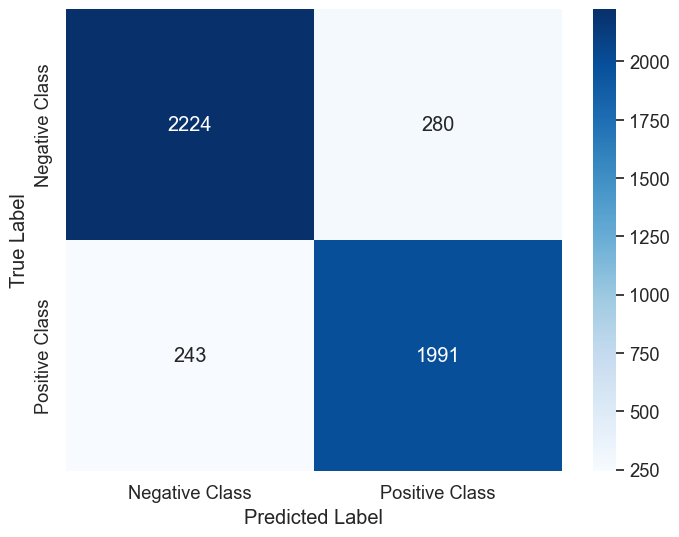

In [24]:
cm = confusion_matrix(y_train, y_pred4)

# Definir rótulos das classes (substitua pelos seus próprios rótulos, se necessário)
class_names = ['Negative Class', 'Positive Class']

# Plotar a matriz de confusão usando Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Ajuste o tamanho da fonte

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()